# Essay Grading
Azhari Haris Al Hamdi - 2106782694

link notebook : https://colab.research.google.com/drive/1UziqdT23XmptxEX8vBENpD5Fk5TwMHAe?usp=sharing

Data Splitting :

* 80% data training dengan randomize
* 20% data testing dengan randomize

Feature Extractor :

* Fusion Feature (penggabungan dengan set tanpa mengubah order)
* TF-IDF
* cosine similarity
* word2vec

Metode :

* Multinomial Naive Bayes
* Decission Tree Regressor
* XGBoost Regressor
* Random Forest Classifier
* Simple LSTM Concatenate

data :

nama file : "dataset_esay grading.csv"

* feature 1: "jawaban_mahasiswa"

* feature 2: "jawaban_dosen"

* label : "human_rater"

* label2 : "human_rater_scaled"

# Diagram Blok Penyelesaian Classifikasi dan Analisis Permasalahan

![](https://drive.google.com/uc?export=view&id=1WHR0-TPzz5Eh3Z6HFjPQ96pvqq0R_PAv)

Dataset yang digunakan memiliki kelas target yang jumlahnya lebih dari dua, sehingga untuk metode classifier ada dua cara yang bisa dilakukan :

1. dengan metode multilabel classification yaitu memprediksi kelas yang hasil prediksinya bisa terdapat kelas dominan dengan probabilitas kelas yang dianggap positif adalah > 0.5. pada metode ini digunakan sigmoid dan multilabel binary method.

2. dengan metode multiclass classification yaitu memprediksi kelas yang dihasilkan hanya satu yang mungkin paling dominan. jika ada kelas yang probabilitasnya > 0.5 maka kelas yang lain tidak mungkin > 0.5 atau kelas yang paling tinggi scorenya maka itulah yang keluar sebagai kelas prediksi. pada metode ini digunakan softmax.

dari 2 metode ini saya memilih metode kedua yaitu dengan multiclass classification dengan softmax. pada data target kelas akan dilakukan label encoding untuk mendapatkan urutannya dan mempermudah prediksi karena menggunakan number sebagai data target bukan kata categorical.

# Install, Import dan Download Library Dependency [1] [2]

In [ ]:
!pip install Sastrawi

!pip install jupyterlab-widgets
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

!pip install parfit

!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: bundlerextension console execu

In [ ]:
import sys
import random
import re
import io
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import parfit.parfit as pf

import matplotlib.pyplot as plt
import seaborn as sns

import fasttext.util
import gensim

from sklearn.metrics.pairwise import cosine_similarity
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

import scipy.sparse as sp

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# fasttext.util.download_model('id', if_exists='ignore')

# Upload File dataset menggunakan dataset dari emas dengan nama "dataset_esay grading.csv"

## Uncomment code dibawah ini jika memakai jupyter notebook

In [ ]:
# from ipywidgets import FileUpload
# from IPython.display import display
# upload = FileUpload(accept='.csv', multiple=False)

## Run code dibawah ini jika memakai Google Colaboratory notebook

In [ ]:
# It will prompt you to select a file. Click on “Choose Files” then select and upload the file. 
# Wait for the file to be 100% uploaded.
from google.colab import files
uploaded = files.upload()

Saving dataset_esay grading.csv to dataset_esay grading (1).csv


# Exploratory Data Analysis

Import Data, gunakan nama **"dataset_esay grading.csv"**

tidak ada header pada dataset, jadi disini dibuat headernya(feature dan label) untuk membantu analisis dataframe.

In [ ]:
# To store dataset in a Pandas Dataframe
df = pd.read_csv('dataset_esay grading.csv')
temp = df.copy()
df

,jawaban_mahasiswa,jawaban_dosen,human_rater,human_rater_scaled
0,komputer menggunakan layanan tersedia jaringan,client server jaringan komputer model komunika...,20,0.2
1,fundamental centralized infrastructure,client server jaringan komputer model komunika...,20,0.2
2,hubungan komponen jaringan berkomunikasi,client server jaringan komputer model komunika...,30,0.3
3,client server jaringan komunikasi client serve...,client server jaringan komputer model komunika...,40,0.4
4,client server jaringan 2 buah cliet 1 server s...,client server jaringan komputer model komunika...,40,0.4
...,...,...,...,...
215,turbo boost sistem diberikan produsen prosesor...,turbo boost salah satu fitur prosesor masa ber...,70,0.7
216,turbo boost mempercepat kinerja processor memi...,turbo boost salah satu fitur prosesor masa ber...,80,0.8
217,turbo boost kondisi dimana terjadi penambahan ...,turbo boost salah satu fitur prosesor masa ber...,60,0.6
218,turbo boost fitur prosesor untuk meningkatkan ...,turbo boost salah satu fitur prosesor masa ber...,80,0.8


dari informasi type tiap kolom sesuai dengan type datanya masing-masing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   jawaban_mahasiswa   220 non-null    object 
 1   jawaban_dosen       220 non-null    object 
 2   human_rater         220 non-null    int64  
 3   human_rater_scaled  220 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.0+ KB


check apakah ada NaN. dari hasil check tidak ada row yang NaN

In [ ]:
df.isna().any()

jawaban_mahasiswa     False
jawaban_dosen         False
human_rater           False
human_rater_scaled    False
dtype: bool

count label tiap kelas dan plot dengan barplot

100    57
80     42
90     37
60     26
70     19
40     12
50      8
20      6
30      6
10      4
0       2
79      1
Name: human_rater, dtype: int64

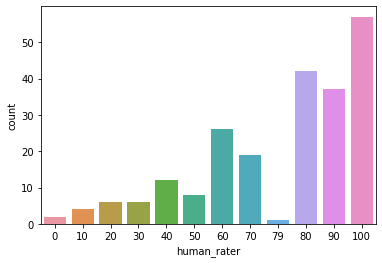

In [ ]:
display(df['human_rater'].value_counts())
sns.countplot(x=df['human_rater'])

dari hasil plot sebelum preprocessing data tidak balance, sehingga diperlukan balancing data untuk tiap kelas.

# Data Preparation

## Menghilangkan special karakter yang tidak dikenali dalam environtment python seperti “, ”, ‘’. yang mengacu pada tanda kutip dalam kata tidak langsung. 

In [ ]:
df = temp.copy()
# for i, kalimat in enumerate(df["feature"]):
for i, dataDF in df.iterrows():
  dataDF["jawaban_mahasiswa"] = dataDF["jawaban_mahasiswa"].replace("“", "\"")
  dataDF["jawaban_mahasiswa"] = dataDF["jawaban_mahasiswa"].replace("‘’", "\"")
  dataDF["jawaban_mahasiswa"] = dataDF["jawaban_mahasiswa"].replace("”", "\"")

  dataDF["jawaban_dosen"] = dataDF["jawaban_dosen"].replace("“", "\"")
  dataDF["jawaban_dosen"] = dataDF["jawaban_dosen"].replace("‘’", "\"")
  dataDF["jawaban_dosen"] = dataDF["jawaban_dosen"].replace("”", "\"")
#   df.loc[i,"feature"] = kalimat

df.pop('human_rater_scaled')

0      0.2
1      0.2
2      0.3
3      0.4
4      0.4
      ... 
215    0.7
216    0.8
217    0.6
218    0.8
219    0.7
Name: human_rater_scaled, Length: 220, dtype: float64

karena kelas 79 cuma ada 1, maka sebaiknya kelas 79 dihapus karena akan mengacaukan proses learning

In [ ]:
df.drop(df.index[df['human_rater'] == 79], inplace = True)
# df = df[df.human_rater != 79]

100    57
80     42
90     37
60     26
70     19
40     12
50      8
20      6
30      6
10      4
0       2
Name: human_rater, dtype: int64

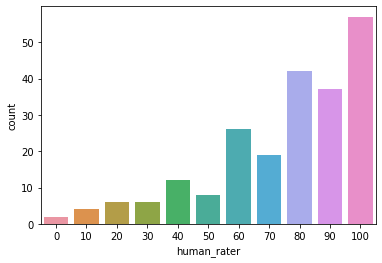

In [ ]:
display(df['human_rater'].value_counts())
sns.countplot(x=df['human_rater'])

## transform ke huruf kecil, stopword, stemming, transform kalimat dari satu menjadi banyak kalimat, dan penghilangan tanda baca dan special karakter

menggunakan metode stopword dan stemming dalam kosa kata bahasa indonesia dengan library sastrawi. stop word diperlukan karena dalam sample kalimat di dataset ada kata yang tidak perlu seperti kata sang, si, adalah dan lain sebagainya, serta membalikkan kata dalam text menjadi kata dasarnya (stemming). [1] [2] 

pada metode dibawah ini, juga dilakukan transformasi kalimat menjadi beberapa kalimat karena ada banyak baris pada dataset beberapa kalimat yang disusun menjadi satu kalimat. metode ini juga untuk balancing class yang sedikit.

selanjutnya dilakukan penghilangan tanda baca atau special character yang lain yang bisa mengganggu corpus, karena ada banyak special character yang menyatu dengan kata. number juga dihilangkan pada proses dibawah ini karena numberik tidak memberikan korelasi dan informasi terhadap kelas data target.

dari metode dibawah ini semua proses ditanpung dalam satu list `new_data`

In [ ]:
def preprocessing_text(df):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()

    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    new_data = []
    exclude = ['', '"', '”']

    df['jawaban_mahasiswa'] = df['jawaban_mahasiswa'].str.strip().str.lower()
    df['jawaban_dosen'] = df['jawaban_dosen'].str.strip().str.lower()

    for index, row in df.iterrows():
        label = row['human_rater']
        sentence_mahasiswa = row['jawaban_mahasiswa']
        sentence_dosen = row['jawaban_dosen']
        ## === menghilangkan kata yang dianggap tidak mengacu pada inti kalimatnya, seperti kata sang, si, dan, itu, dan lain sebagainya
        sentence_mahasiswa = stopword.remove(sentence_mahasiswa)
        sentence_dosen = stopword.remove(sentence_dosen)

        ## === mentransformasi kata-kata pada text menjadi kata dasarnya
        sentence_mahasiswa = stemmer.stem(sentence_mahasiswa)
        sentence_dosen = stemmer.stem(sentence_dosen)
        # sentence = sentence_stemming if sentence_stopwords == "" or sentence_stopwords == " " else sentence_stopwords

        df.at[index, 'jawaban_mahasiswa']= sentence_mahasiswa
        df.at[index, 'jawaban_dosen']= sentence_dosen

        # sentence = find_words = re.compile(r'(?<!\S)[A-Za-z]+(?!\S)|(?<!\S)[A-Za-z]+(?=:(?!\S))').findall
        # sentence = re.match("^[A-Za-z]*$", sentence):
        tokens_mahasiswa = nltk.tokenize.sent_tokenize(sentence_mahasiswa)
        tokens_dosen = nltk.tokenize.sent_tokenize(sentence_dosen)

        if len(tokens_mahasiswa) > 1 or len(tokens_dosen)>1:
            print("here")
            test = []
            for i, token in enumerate(tokens):
                ## === splitting text menjadi beberapa kalimat berdasarkan tanda ? ! "" dengan split regex
                test += re.split(r'[!?"(.*?)"]+|(?<!\.)\.(?!\.)', token)

            ## === menghapus tanda baca dan number pada kalimat yang dihasilkan dengan substract regex
            tokens = [re.sub(r'[^\w]', ' ', i) for i in test if i not in exclude]

            ## === menghilangkan angka dengan substract regex
            tokens = [re.sub("(\s\d+)","",i)  for i in tokens]

            for i, token in enumerate(tokens):
                if token != '' or token != ' ' or token != "\"":

                    ## === menghilangkan duplicate words
                    token = ' '.join(dict.fromkeys(token.split()))

                    new_data.append([token, label])
    return df.copy()

## spliting dataset menjadi 80% training dan 20% testing untuk tiap kelas

random state dibuat 1 karena harus terjadi pengacakan pada data training dan data testing pada setiap kali method train_test_split dijalankan

![](https://drive.google.com/uc?export=view&id=1mqjNvGkYxaCrQrKO-LW8AqAywaQP3nlm)

In [ ]:
from sklearn.model_selection import train_test_split

# for data in list_df:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=44, shuffle=True)

## preprocessing data training

preprocessing data training dengan fungsi yang sudah didefinisikan sebelumnya

,jawaban_mahasiswa,jawaban_dosen,human_rater
28,client server salah satu model jaring device t...,client server jaring komputer model komunikasi...,80
13,client host beri request server jaring compute...,client server jaring komputer model komunikasi...,60
195,turbo boost overload jadi komputer laptop,turbo boost salah satu fitur prosesor masa tuj...,0
185,turbo boost aplikasi tuju optimal mem boost ke...,turbo boost salah satu fitur prosesor masa tuj...,100
208,teknologi cepat,turbo boost salah satu fitur prosesor masa tuj...,10
...,...,...,...
132,von neumann gambar komputer empat bagi utama u...,komputer model von neumann model arsitektur de...,90
60,hibernate salah satu proses komputer mati mati...,hibernate pc fitur mati pc waktu sleep fitur g...,100
174,turbo boost proses boot cepat cold boot tahap ...,turbo boost salah satu fitur prosesor masa tuj...,60
164,komputer von neumann komputer pertama buat joh...,komputer model von neumann model arsitektur de...,90


100    44
80     33
90     28
60     23
70     18
40      9
50      7
20      5
30      4
10      3
0       1
Name: human_rater, dtype: int64

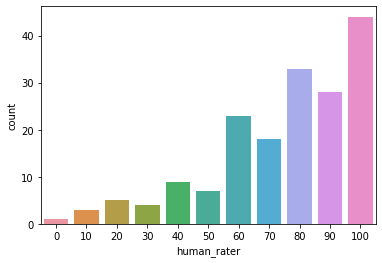

In [ ]:
data_train = preprocessing_text(train_df)
dataset = preprocessing_text(df)

# data_train['human_rater'] = data_train['human_rater']/10
display(data_train)
display(data_train['human_rater'].value_counts())
sns.countplot(data_train['human_rater'])

## balancing class : oversampling dengan augmentasi [3][4]

pada tahap ini dilakukan balancing class dengan menggunakan teknik oversampling dengan merujuk pada kelas yang paling banyak yaitu kelas "senang". oversampling yang dilakukan disini dengan menggunakan Easy Data Augmentation Techniques(EDA) [3] pada text. ada empat cara melakukan Easy Data Augmentation pada text [3]:

1.   SR: synonym replacement
2.   RD: random deletion
3.   RS: random swap
4.   RI: random insertion

![](https://drive.google.com/uc?export=view&id=1gjONCCjRxrDl09Y6M052WBiqkttfq7eO)






pada project ini tidak digunakan augmentasi dengan metode pengacakan karena dianggap urutan kata penting dan mempengaruhi hasil 

In [ ]:
use_augmentation = False

In [ ]:
label_attr = dataset['human_rater'].value_counts().to_dict()
label_class = dataset['human_rater'].value_counts().index.to_list()
major_class = max(label_attr, key=label_attr.get)
major_class_num = label_attr[major_class]
print("kelas yang paling banyak berjumlah:", major_class_num)

kelas yang paling banyak berjumlah: 57


### berikut metode yang diambil dari [4]



In [ ]:
def swap_word(new_words):
    
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        
        if counter > 3:
            return new_words
    
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
    return new_words

def random_swap(words, n):
    
    words = words.split()
    new_words = words.copy()
    
    for _ in range(n):
        new_words = swap_word(new_words)
        
    sentence = ' '.join(new_words)
    
    return sentence

pemisahan data tiap kelas sehingga tiap kelas memiliki data frame masing-masing untuk memudahkan analisis dan augmentasi.

In [ ]:
list_df = []
if use_augmentation:
    for label in label_class:
        df_temp = data_train[data_train['human_rater'] == label]
        df_temp.reset_index(drop=True, inplace=True)
        list_df.append(df_temp)

penggabungan hasil augmentasi pada data frame menjadi dataset baru 

```
list_df
```
kemudian divisualisasikan class yang telah diaugmentasi tadi. hasilnya semua kelas sudah balance.


In [ ]:
if use_augmentation:
    for i, data_class in enumerate(list_df):
        first_data = len(data_class)
        diff = major_class_num - len(list_df[i])
        label = data_class['human_rater'][0]
        add_df = []
        if diff > 0:
            iter = major_class_num // len(data_class)
            for j in range(iter):
                feature_ref = data_class['jawaban_dosen'][j]
                diff = major_class_num - len(list_df[i])
                n_random = diff if diff < first_data else first_data
                feature2aug = random.sample(data_class['jawaban_mahasiswa'].to_list(), n_random)
                for featureaug in feature2aug:
                    feature_rand = random_swap(featureaug, j)
                    # add_df.append([feature_rand, label])
                    list_df[i].loc[len(list_df[i])] = [feature_rand, feature_ref, label]
                rest = major_class_num - len(data_class)
                if rest <= 0:
                    break

augmentasi kalimat dilakukan dengan cara random swap. pengambilan kalimat dari data frame yang telah dipisahkan sebelumnya dilakukan dengan acak. random swap dilakukan pada suatu kelas hingga jumlah kelas tersebut sama seperti kelas mayor.

alasan penggunaan random swap adalah karena feature extraction pada langkah selanjutnya digunakan bag of words yang diasumsikan bahwa 

1.   Posisi features (words) tidak penting.
2.   Feature Probabilities P(Xi|Cj) adalah independen pada tiap kelas (C).



In [ ]:
if use_augmentation:
    data_train = pd.concat(list_df)
    display(data_train)
    display(data_train['human_rater'].value_counts())
    sns.countplot(data_train['human_rater'])

## Label Encoding

agar proses learning terhadap data target merujuk pada number bukan pada data ordinal

In [ ]:
## === Label Encoding
labelencode = LabelEncoder()

y = dataset['human_rater']
y_train = data_train['human_rater']

labelencode.fit(y)

y_train = labelencode.transform(y_train)

In [ ]:
y_train

array([ 8,  6,  0, 10,  1,  4,  6,  5,  9, 10, 10, 10, 10,  6,  7, 10, 10,
        8, 10,  1,  8,  4,  2,  9,  9,  8,  9,  7,  8,  3,  5,  4,  7, 10,
        4,  1, 10,  8,  8,  9,  9, 10,  7, 10,  8,  8,  9, 10,  8, 10,  2,
        5,  9, 10,  8,  6,  7,  4,  9,  8,  9, 10,  6,  8,  3,  7,  2, 10,
       10, 10, 10, 10, 10,  8,  3, 10,  4, 10,  9,  8, 10,  6,  6,  3,  6,
        9,  9,  4,  9,  5,  9,  6,  4,  6,  7, 10,  9,  7, 10,  9,  9,  6,
       10,  8,  8,  5,  7, 10,  7,  9,  7,  9,  8,  9,  8, 10,  7, 10,  6,
        6,  6,  6,  8,  4,  5, 10,  8,  8, 10,  9, 10,  7,  8,  6,  6, 10,
       10,  8, 10,  7,  8,  8,  9,  6, 10,  2,  8, 10, 10,  8,  5,  7, 10,
        9,  6,  6,  2,  8,  8,  9, 10,  6, 10,  8,  8,  6,  9,  7,  7,  8,
        9, 10,  6,  9,  7])

# Feature Extraction

## Merge "jawaban_dosen" dengan "jawaban_mahasiswa"

dengan jawaban dosen sebagai referensi. penggabungan dilakukan dengan union tanpa mengubah urutan text "jawaban_dosen" dan "jawaban_mahasiswa". kemudian dilakukan pengambilan kata unique sehingga kata yang sama terhapus

In [ ]:
def unique(sequence):
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]

In [ ]:
def fuse2text(data_df):
    unique_list = []
    for index, row in data_df.iterrows():
        label = row['human_rater']
        sentence_mahasiswa = row['jawaban_mahasiswa'].split(' ')
        sentence_dosen = row['jawaban_dosen'].split(' ')

        sequence = sentence_dosen + sentence_mahasiswa
        # uniqueWords = list(set(sentence_dosen).union(set(sentence_mahasiswa)))
        uniqueWords = unique(sequence)
        uniqueWords = ' '.join(uniqueWords)
        unique_list.append(uniqueWords)
    # df
    temp = data_df.copy()
    temp['unique_corpus']=unique_list
    return temp

## TF-IDF

![](https://drive.google.com/uc?export=view&id=1-bC7gwMKeaO6aI6lVTLEwEVhgQJ9z3LA)

![](https://drive.google.com/uc?export=view&id=1LkCoXniCetdDJ4kW-_GgLN1jjHwd7pDM)

generate tf-idf vector dengan TfidfVectorizer() [5]. TF-IDF (term frequency-inverse document frequency) menggenerate vector berdasarkan jumlah vocab dari data yang digunakan berdasarkan seberapa sering muncul kata tersebut. kemudian dilakukan invers sehingga kata yang paling sering muncul ialah kata dengan ranking yang lebih rendah. hal ini menandakan kata yang tidak sering muncul memiliki informasi yang lebih berarti daripada kata yang sering muncul. 

In [ ]:
## == TF-IDF Vectorization

# vec_fuse = CountVectorizer()
vec_fuse = TfidfVectorizer()

train_df.reset_index(drop=True, inplace=True)

data_train = fuse2text(data_train)
dataset = fuse2text(dataset)

x_train_fuse = data_train['unique_corpus']
x_fuse = dataset['unique_corpus']

vec_fuse.fit(x_fuse)
x_train_fuse = vec_fuse.transform(x_train_fuse).toarray()

Menampilkan hasil vectorisasi TF-IDF dengan frequensi katanya

In [ ]:
word_list = vec_fuse.get_feature_names()
count_list = x_train_fuse.sum(axis=0)
print(dict(zip(word_list,count_list)))

{'10': 0.0, '1903': 0.22682689656828148, '1940': 0.25951939872267715, '1945': 5.651929567691077, '1950': 0.25951939872267715, '1957': 0.22682689656828148, '3210m': 0.1747621580652836, '60': 0.2662852418699836, '9850h': 0.2662852418699836, 'ac': 0.0, 'access': 0.8546105280800855, 'ack': 0.28705368026968564, 'acknowledgement': 0.2850055080096286, 'ada': 3.554594713762153, 'address': 0.4003279963008876, 'admin': 0.0, 'adress': 0.2840861913291517, 'airmatika': 0.2237488165720771, 'ajar': 0.2788180514165562, 'aju': 0.3453616184232821, 'akan': 0.2944845473827986, 'akhir': 0.8446701766439743, 'akibat': 0.4395293718165699, 'akses': 2.320662753602261, 'aktif': 0.8677595137914147, 'aktivitas': 0.27242084375806924, 'akumulator': 0.0, 'alamat': 0.33129645297966787, 'alami': 5.2117207338996945, 'alan': 0.20067312707629223, 'alat': 1.6808641427661537, 'algorithm': 0.2600117945497882, 'alih': 0.2735383812391052, 'alir': 0.19654218635697582, 'aljabar': 0.20914031375377554, 'alokasi': 0.242199709020166

## ***Extraksi Similarity "jawaban_mahasiswa" dan "jawaban_dosen" [9]***

Extraksi Similarity "jawaban_mahasiswa" dan "jawaban_dosen" dengan menggunakan cosine similarity. nilai similarity diambil karena infrmasi kemiripan antar dokumen dianggap penting

In [ ]:
similarity = []

# vec_train_sim = CountVectorizer()
vec_train_sim = TfidfVectorizer()

for index, row in data_train.iterrows():
    corpus = [row['jawaban_mahasiswa'], row['jawaban_dosen']]
    sparse_matrix = vec_train_sim.fit_transform(corpus)
    doc_term_matrix = sparse_matrix.todense()
    sim = cosine_similarity(sparse_matrix[0], sparse_matrix[1]).reshape(-1, 1)
    similarity.append(sim[0][0])

data_train["similarity"] = similarity

x_train_sim = data_train['similarity'].to_numpy()
y_train_sim = data_train['human_rater'].to_numpy()

## ***Extraksi fitur Word2Vec pada "jawaban_mahasiswa" dan "jawaban_dosen" [15]***

ekstraksi word2vec diperlukan untuk melihal seberapa related hubungan antara kata terhadap corpus pada dokumen training. nilai ini dianggap bisa mendapatkan nilai yang baik pada hubungan antara kata dan urutan kata yang mungkin. vektor yang didapat diharapkan mampu memprediksi target dengan baik.

In [ ]:
# X_mhs_test = data_test['jawaban_mahasiswa']

X_mhs_train = data_train['jawaban_mahasiswa']
X_mhs = dataset['jawaban_mahasiswa']

generate word2vec dilakukan library gensim[16]. generate word2vec dilakukan pada kolom "jawaban_mahasiswa", "jawaban_dosen", dan "unique_corpus"

In [ ]:
## Mahasiswa

w2v_model_mhs = gensim.models.Word2Vec(data_train['jawaban_mahasiswa'],
                                   size=100,
                                   window=5,
                                   min_count=2)

words_mhs = set(w2v_model_mhs.wv.index2word)
X_train_vect_mhs = np.array([np.array([w2v_model_mhs.wv[i] for i in ls if i in words_mhs])
                         for ls in data_train['jawaban_mahasiswa']])

X_train_vect_avg_mhs = []
for v in X_train_vect_mhs:
    if v.size:
        X_train_vect_avg_mhs.append(v.mean(axis=0))
    else:
        X_train_vect_avg_mhs.append(np.zeros(100, dtype=float))

data_train["word2vec_mahasiswa"] = X_train_vect_avg_mhs

## Dosen

w2v_model_dsn = gensim.models.Word2Vec(data_train['jawaban_dosen'],
                                   size=100,
                                   window=5,
                                   min_count=2)

words_dsn = set(w2v_model_dsn.wv.index2word)
X_train_vect_dsn = np.array([np.array([w2v_model_dsn.wv[i] for i in ls if i in words_dsn])
                         for ls in data_train['jawaban_dosen']])

X_train_vect_avg_dsn = []
for v in X_train_vect_dsn:
    if v.size:
        X_train_vect_avg_dsn.append(v.mean(axis=0))
    else:
        X_train_vect_avg_dsn.append(np.zeros(100, dtype=float))

data_train["word2vec_dosen"] = X_train_vect_avg_dsn

## Unique Corpus -> gabungan jawaban dose dengan jawaban mahasiswa dengan irisan tanpa mempengaruhi urutan

w2v_model_fuse = gensim.models.Word2Vec(data_train['unique_corpus'],
                                   size=100,
                                   window=5,
                                   min_count=2)

words_fuse = set(w2v_model_fuse.wv.index2word)
X_train_vect_fuse = np.array([np.array([w2v_model_fuse.wv[i] for i in ls if i in words_fuse])
                         for ls in data_train['unique_corpus']])

X_train_vect_avg_fuse = []
for v in X_train_vect_fuse:
    if v.size:
        X_train_vect_avg_fuse.append(v.mean(axis=0))
    else:
        X_train_vect_avg_fuse.append(np.zeros(100, dtype=float))

data_train["word2vec_unique"] = X_train_vect_avg_fuse

In [ ]:
data_train

,jawaban_mahasiswa,jawaban_dosen,human_rater,unique_corpus,similarity,word2vec_mahasiswa,word2vec_dosen,word2vec_unique
28,client server salah satu model jaring device t...,client server jaring komputer model komunikasi...,80,client server jaring komputer model komunikasi...,0.239437,"[0.1718748, 0.05314775, -0.2056655, 0.00389290...","[0.12471636, -0.008884163, -0.06988157, 0.0531...","[0.15136693, 0.013977049, -0.1465013, 0.125178..."
13,client host beri request server jaring compute...,client server jaring komputer model komunikasi...,60,client server jaring komputer model komunikasi...,0.147015,"[0.171781, 0.053494096, -0.20604298, 0.0044455...","[0.12471636, -0.008884163, -0.06988157, 0.0531...","[0.15158494, 0.014591474, -0.1485367, 0.124536..."
195,turbo boost overload jadi komputer laptop,turbo boost salah satu fitur prosesor masa tuj...,0,turbo boost salah satu fitur prosesor masa tuj...,0.070616,"[0.16939604, 0.052385226, -0.20414022, 0.00540...","[0.12968582, -0.003922017, -0.07866789, 0.0529...","[0.15122044, 0.014663451, -0.14932106, 0.12377..."
185,turbo boost aplikasi tuju optimal mem boost ke...,turbo boost salah satu fitur prosesor masa tuj...,100,turbo boost salah satu fitur prosesor masa tuj...,0.269437,"[0.17055349, 0.052563004, -0.20453711, 0.00543...","[0.12968582, -0.003922017, -0.07866789, 0.0529...","[0.15134631, 0.0145031335, -0.14865267, 0.1241..."
208,teknologi cepat,turbo boost salah satu fitur prosesor masa tuj...,10,turbo boost salah satu fitur prosesor masa tuj...,0.064026,"[0.1707483, 0.053401127, -0.20459889, 0.004663...","[0.12968582, -0.003922017, -0.07866789, 0.0529...","[0.15120964, 0.014586348, -0.1486631, 0.123966..."
...,...,...,...,...,...,...,...,...
132,von neumann gambar komputer empat bagi utama u...,komputer model von neumann model arsitektur de...,90,komputer model von neumann arsitektur deskrips...,0.214476,"[0.17019439, 0.05250575, -0.20338745, 0.004974...","[0.13300255, -0.003686872, -0.08360655, 0.0531...","[0.15267393, 0.015892724, -0.15636903, 0.12304..."
60,hibernate salah satu proses komputer mati mati...,hibernate pc fitur mati pc waktu sleep fitur g...,100,hibernate pc fitur mati waktu sleep guna tenag...,0.289743,"[0.17023729, 0.052834675, -0.20350368, 0.00491...","[0.1254824, -0.0073053217, -0.07071895, 0.0530...","[0.15196744, 0.014008712, -0.14527313, 0.12719..."
174,turbo boost proses boot cepat cold boot tahap ...,turbo boost salah satu fitur prosesor masa tuj...,60,turbo boost salah satu fitur prosesor masa tuj...,0.056620,"[0.17117949, 0.05318662, -0.20596975, 0.005100...","[0.12968582, -0.003922017, -0.07866789, 0.0529...","[0.15130164, 0.014681937, -0.14912382, 0.12411..."
164,komputer von neumann komputer pertama buat joh...,komputer model von neumann model arsitektur de...,90,komputer model von neumann arsitektur deskrips...,0.345523,"[0.17111295, 0.053204264, -0.20601185, 0.00529...","[0.13300255, -0.003686872, -0.08360655, 0.0531...","[0.15283668, 0.016685134, -0.16055618, 0.12157..."


# ***Data Test Preparation***

persiapan data testing dengan perlaukuan sesuai dengan data training

proprocessing data test

In [ ]:
data_test = preprocessing_text(test_df)
data_test.reset_index(drop=True, inplace=True)

label encoding y test

In [ ]:
y_test = data_test['human_rater']

y_test = labelencode.transform(y_test)

fuse "jawaban_dosen" dengan "jawaban_mahasiswa" pada data test

In [ ]:
data_test = fuse2text(data_test)

x_test_fuse = data_test['unique_corpus']

x_test_fuse = vec_fuse.transform(x_test_fuse).toarray()

cosine similarity pada data test

In [ ]:
# vec_test_sim = CountVectorizer()
vec_test_sim = TfidfVectorizer()

similarity_test = []

for index, row in data_test.iterrows():
    corpus = [row['jawaban_mahasiswa'], row['jawaban_dosen']]
    sparse_matrix = vec_test_sim.fit_transform(corpus)
    doc_term_matrix = sparse_matrix.todense()
    sim = cosine_similarity(sparse_matrix[0], sparse_matrix[1]).reshape(-1, 1)
    similarity_test.append(sim[0][0])

data_test["similarity"] = similarity_test

# x_test_sim = data_test['similarity'].to_numpy()
# y_test_sim = data_test['human_rater'].to_numpy()

Woed2Vec pada Data test

In [ ]:
## Mahasiswa

w2v_model_mhs = gensim.models.Word2Vec(data_test['jawaban_mahasiswa'],
                                   size=100,
                                   window=5,
                                   min_count=2)

words_mhs = set(w2v_model_mhs.wv.index2word)
X_test_vect_mhs = np.array([np.array([w2v_model_mhs.wv[i] for i in ls if i in words_mhs])
                         for ls in data_test['jawaban_mahasiswa']])

X_test_vect_avg_mhs = []
for v in X_test_vect_mhs:
    if v.size:
        X_test_vect_avg_mhs.append(v.mean(axis=0))
    else:
        X_test_vect_avg_mhs.append(np.zeros(100, dtype=float))

data_test["word2vec_mahasiswa"] = X_test_vect_avg_mhs

## Dosen

w2v_model_dsn = gensim.models.Word2Vec(data_test['jawaban_dosen'],
                                   size=100,
                                   window=5,
                                   min_count=2)

words_dsn = set(w2v_model_dsn.wv.index2word)
X_test_vect_dsn = np.array([np.array([w2v_model_dsn.wv[i] for i in ls if i in words_dsn])
                         for ls in data_test['jawaban_dosen']])

X_test_vect_avg_dsn = []
for v in X_test_vect_dsn:
    if v.size:
        X_test_vect_avg_dsn.append(v.mean(axis=0))
    else:
        X_test_vect_avg_dsn.append(np.zeros(100, dtype=float))

data_test["word2vec_dosen"] = X_test_vect_avg_dsn

## Unique Corpus -> gabungan jawaban dose dengan jawaban mahasiswa dengan irisan tanpa mempengaruhi urutan

w2v_model_fuse = gensim.models.Word2Vec(data_test['unique_corpus'],
                                   size=100,
                                   window=5,
                                   min_count=2)

words_fuse = set(w2v_model_fuse.wv.index2word)
X_test_vect_fuse = np.array([np.array([w2v_model_fuse.wv[i] for i in ls if i in words_fuse])
                         for ls in data_test['unique_corpus']])

X_test_vect_avg_fuse = []
for v in X_test_vect_fuse:
    if v.size:
        X_test_vect_avg_fuse.append(v.mean(axis=0))
    else:
        X_test_vect_avg_fuse.append(np.zeros(100, dtype=float))

data_test["word2vec_unique"] = X_test_vect_avg_fuse

In [ ]:
data_test

,jawaban_mahasiswa,jawaban_dosen,human_rater,unique_corpus,similarity,word2vec_mahasiswa,word2vec_dosen,word2vec_unique
0,komputer model von neumann komputer milik arsi...,komputer model von neumann model arsitektur de...,90,komputer model von neumann arsitektur deskrips...,0.280871,"[0.1802827, 0.03181845, -0.26937115, 0.1060958...","[0.1406437, 0.059035134, -0.25825602, 0.078928...","[0.14541845, 0.14433952, -0.2628474, 0.0949863..."
1,mati komputer simpan kondisi akhir,hibernate pc fitur mati pc waktu sleep fitur g...,40,hibernate pc fitur mati waktu sleep guna tenag...,0.205523,"[0.1800874, 0.031097258, -0.2678463, 0.1057570...","[0.14062996, 0.059194397, -0.25772485, 0.07889...","[0.14474851, 0.14375794, -0.26114187, 0.094403..."
2,arsitektur komputer pertama buat digunkakan hi...,komputer model von neumann model arsitektur de...,30,komputer model von neumann arsitektur deskrips...,0.113014,"[0.18145587, 0.031606287, -0.26947266, 0.10546...","[0.1406437, 0.059035134, -0.25825602, 0.078928...","[0.1458073, 0.1446048, -0.2633788, 0.09505808,..."
3,hibernate ada komputer mati mesin ram rom nyal...,hibernate pc fitur mati pc waktu sleep fitur g...,20,hibernate pc fitur mati waktu sleep guna tenag...,0.240563,"[0.17903604, 0.031684667, -0.267176, 0.1053541...","[0.14062996, 0.059194397, -0.25772485, 0.07889...","[0.14447325, 0.14362164, -0.26079622, 0.09426,..."
4,hibernate mati komputer total tetap simpan apl...,hibernate pc fitur mati pc waktu sleep fitur g...,80,hibernate pc fitur mati waktu sleep guna tenag...,0.377486,"[0.18059292, 0.03180016, -0.2691703, 0.1062313...","[0.14062996, 0.059194397, -0.25772485, 0.07889...","[0.14452372, 0.143514, -0.26078853, 0.09437076..."
5,jaring computer kenal 2 istilah client server ...,client server jaring komputer model komunikasi...,90,client server jaring komputer model komunikasi...,0.172493,"[0.18097028, 0.032011893, -0.2702325, 0.106341...","[0.14118998, 0.05887977, -0.2585953, 0.0790464...","[0.1443788, 0.14305338, -0.26065725, 0.0943268..."
6,hibernate salah satu mode power off windows tu...,hibernate pc fitur mati pc waktu sleep fitur g...,50,hibernate pc fitur mati waktu sleep guna tenag...,0.197020,"[0.18001573, 0.031789966, -0.26873562, 0.10602...","[0.14062996, 0.059194397, -0.25772485, 0.07889...","[0.14485314, 0.14391343, -0.26140672, 0.094551..."
7,client server interaksi jaring client user kir...,client server jaring komputer model komunikasi...,90,client server jaring komputer model komunikasi...,0.382776,"[0.18087222, 0.032112546, -0.26999784, 0.10606...","[0.14118998, 0.05887977, -0.2585953, 0.0790464...","[0.14524496, 0.14362551, -0.26194215, 0.094523..."
8,hibernate kondisi mirip sleep komputer nyala e...,hibernate pc fitur mati pc waktu sleep fitur g...,90,hibernate pc fitur mati waktu sleep guna tenag...,0.439544,"[0.17959715, 0.031623613, -0.26857036, 0.10595...","[0.14062996, 0.059194397, -0.25772485, 0.07889...","[0.1447341, 0.14378907, -0.26139507, 0.0945219..."
9,client server server host jadi tempat simpan d...,client server jaring komputer model komunikasi...,100,client server jaring komputer model komunikasi...,0.308027,"[0.1806265, 0.03189378, -0.26923984, 0.1059866...","[0.14118998, 0.05887977, -0.2585953, 0.0790464...","[0.14526984, 0.14369552, -0.2618245, 0.0946407..."


# Modeling Naive Bayes Multinomial [6]

pada metode dibawah ini digunakan perhitungan pencarian probabilitas suatu kata Wj pada kelas Cj dengan mengacu penambahan variabel smooting alpha untuk menghindari pembagian 0. [6][8]

> alpha = 1 -> Laplace Smooting

> alpha < 0 -> Lidstone Smoothing


![](https://drive.google.com/uc?export=view&id=14f7r-WUAuJZdLKgoRN4iH2eK8ZXzJTKn)

In [ ]:
model = MultinomialNB()
model.fit(x_train_fuse, y_train)

print("Score Training dari hasil modeling Multinomial Naive Bayes (tanpa fine tuning):", model.score(x_train_fuse, y_train))

Score Training dari hasil modeling Multinomial Naive Bayes (tanpa fine tuning): 0.42857142857142855


In [ ]:
yhat = model.predict(x_test_fuse)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         1
           8       0.32      0.89      0.47         9
           9       0.30      0.33      0.32         9
          10       0.20      0.08      0.11        13

    accuracy                           0.30        44
   macro avg       0.10      0.15      0.11        44
weighted avg       0.20      0.30      0.21        44



## Tuning hyperparameter menggunakan grid search

disini diterapkan pencarian hyperparameter terbaik dengan grid search. pada grid search ini dilakukan mencapi parameter terhapdap 2 method, TfidfVectorizer dengan rentang max_df = 0.1 - 1 dan ngram-range dari (1,1) hingga (1,5) dan MultinomialNB untuk mencari nilai alpha(bobot smooting) dengan rentang nilai 0.0004 - 10. pada fine tuning ini juga dilakukan cross validation dengan 10 segmen training-testing.[11]

In [ ]:
X = data_train['unique_corpus'].to_numpy()
Y = y_train

pipeline = Pipeline([
    ('BagOfWOrdsMetd', TfidfVectorizer()),
    # ('BagOfWOrdsMetd', CountVectorizer()),
    ('clf', OneVsRestClassifier(MultinomialNB(
        fit_prior=True, class_prior=None))),
])
parameters = {
    'BagOfWOrdsMetd__max_df': (0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5),
    'BagOfWOrdsMetd__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (1,5)],
    'clf__estimator__alpha': (1e+1, 2, 1, 1e-1, 1e-2, 1e-3, 1e-4)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=10, n_jobs=2, verbose=3)
grid_search_tune.fit(X, Y)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 10 folds for each of 315 candidates, totalling 3150 fits
Best parameters set:
[('BagOfWOrdsMetd', TfidfVectorizer(max_df=0.3)), ('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=0.1)))]


dari hasil tuning grid search didapat parameter Bag of Words adalah 

```
max_df=0.15, ngram_range=(1, 2)
```
dan parameter Multinomial NaiveBayes adalah 

```
alpha=1
```
dari nilai alpha yang didapat parameter terbaik jika menggunakan laplace smoothing karena alpha = 1, sedangkan jika alpha < 1 berarti menggunakan Lidstone smoothing



## Menerapkan fine tuning bast parameter dari grid search

In [ ]:
# vec = CountVectorizer(max_df=0.3, ngram_range=(1, 2))
vec_fuse_tune = TfidfVectorizer(max_df=0.1, ngram_range=(1, 2))
x_train_fuse_tune = data_train['unique_corpus']
x_test_fuse_tune = data_test['unique_corpus']

vec_fuse_tune.fit(x_train_fuse_tune)
x_train_fuse_tune = vec_fuse_tune.transform(x_train_fuse_tune).toarray()
x_test_fuse_tune = vec_fuse_tune.transform(x_test_fuse_tune).toarray()

In [ ]:
model = MultinomialNB(alpha=0.0001)
model.fit(x_train_fuse_tune, y_train)

print("Score Training dari hasil Multinomial Naive Bayes (fine tuning):", model.score(x_train_fuse_tune, y_train))

Score Training dari hasil Multinomial Naive Bayes (fine tuning): 0.9828571428571429


## classification report

In [ ]:
yhat = model.predict(x_test_fuse_tune)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         1
           8       0.33      0.33      0.33         9
           9       0.50      0.44      0.47         9
          10       0.56      0.69      0.62        13

    accuracy                           0.41        44
   macro avg       0.24      0.21      0.22        44
weighted avg       0.40      0.41      0.40        44



mendapatkan mapping label encoder untuk memetakan label number ke label class ordinal untuk visualisasi confussion matrix

In [ ]:
target_names = labelencode.classes_.tolist()
label2index = dict(zip(labelencode.classes_,range(len(labelencode.classes_))))
label2index

{0: 0, 10: 1, 20: 2, 30: 3, 40: 4, 50: 5, 60: 6, 70: 7, 80: 8, 90: 9, 100: 10}

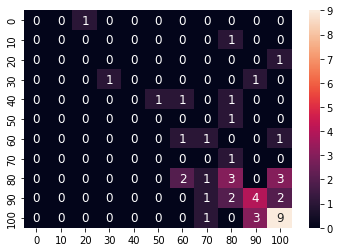

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, yhat)

cm_array_df = pd.DataFrame(confusion_matrix, index=target_names, columns=target_names)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}) 

## Penjelasan

hasil dari multinomial Naive Bayes bersifat overfitting karena nilai training tinggi > 95% sedangkan nilai testing rendah (30-40%). peningkatan akurasi terjadi setelah tuning hyperparameter. artinya hyperparameter yang didapat berkerja dengan baik. pada heatmap banyak terlihat false positif yang dihasilkan (nilai yang dilihat secara vertikal). kelas 100 memiliki nilai false positif yang paling banyak dari kelas lainnya. false negatif terdapat banyak pada kelas 80 dan 90. hasil recall (true positif rate) tertinggi ada pada kelas 100. semua hasil prediksi tertinggi ada pada kelas 100 dengan jumlah data test kelas 100 yang banyak. kelas 30 juga memiliki nilai prediksi tinggi tetapi bila dilihat heatmap, jumlah data kelas 30 berjumlah 1, ini berarti nilai prediksi kelas 30 belum tentu tepat. perbedaan nilai ini disebabkan karena adanya kelas imbalance.

# Modeling secara Regresi dengan Decission Tree Regressor dan XGBoost Regressor

pemilihan decission tree karena decission tree bisa menghasilkan nilai yang lebih baik pada fitur yang banyak. diharapkan dengan menggunakan decission tree ini dapat menghasilkan nilai yang lebih baik dari pada metode yang sebelumnya. pada metode ini digunakan regresi diharapkan dengan hasil yang mendekati nilai acuannya. data yang digunakan sebagai fiturnya adalah data similarity dan data targetnya adalah data human_rater [16]

## Decission Tree Regressor [10]

In [ ]:
y_train_num = data_train["human_rater"]/100
y_test_num = data_test["human_rater"]/100

In [ ]:
x_train_sim = data_train["similarity"].to_numpy().reshape(-1,1)
x_test_sim = data_test["similarity"].to_numpy().reshape(-1,1)

In [ ]:
dtree = DecisionTreeRegressor(max_depth=100, random_state=3)

dtree.fit(x_train_sim, y_train_num)

pred_train_tree= dtree.predict(x_train_sim)
print(np.sqrt(mean_squared_error(y_train_num,pred_train_tree)))
print(r2_score(y_train_num, pred_train_tree))

0.010690449676496976
0.9979417092046764


In [ ]:
pred_test_tree= dtree.predict(x_test_sim)
print(np.sqrt(mean_squared_error(y_test_num,pred_test_tree)))
print(r2_score(y_test_num, pred_test_tree))

0.27675062617979584
-0.044519582981121575


In [ ]:
pd.DataFrame({'true':y_test_num*100, 'predict':pred_test_tree*100, 'mse':[mean_squared_error([i[0]],[i[1]]) for i in list(zip(y_test_num,pred_test_tree))]})

,true,predict,mse
0,90.0,90.0,0.00
1,40.0,90.0,0.25
2,30.0,100.0,0.49
3,20.0,80.0,0.36
4,80.0,100.0,0.04
5,90.0,60.0,0.09
6,50.0,70.0,0.04
7,90.0,70.0,0.04
8,90.0,80.0,0.01
9,100.0,100.0,0.00


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished


-------------SCORING MODELS-------------


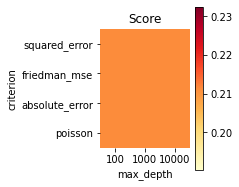

DecisionTreeRegressor(max_depth=100) 0.21136363636363634


In [ ]:
grid = {
    'max_depth': [100, 1000, 10000],
    'criterion'  : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(DecisionTreeRegressor, paramGrid,
           x_train_sim, y_train_num, 
           X_val=x_test_sim, y_val=y_test_num,  
           metric = mean_absolute_error,
           )
print(bestModel, bestScore)

tidak ada improvisasi dari hasil grid search, artinya semua parameter akan menghasilkan nilai prediksi yang sama

In [ ]:
dtree = DecisionTreeRegressor(max_depth=100, criterion='absolute_error', random_state=3)

dtree.fit(x_train_sim, y_train_num)

pred_train_tree= dtree.predict(x_train_sim)
print(np.sqrt(mean_squared_error(y_train_num,pred_train_tree)))
print(r2_score(y_train_num, pred_train_tree))

0.010690449676496976
0.9979417092046764


In [ ]:
pred_test_tree= dtree.predict(x_test_sim)
print(np.sqrt(mean_squared_error(y_test_num,pred_test_tree)))
print(r2_score(y_test_num, pred_test_tree))

0.27675062617979584
-0.044519582981121575


### regression report

In [ ]:
pd.DataFrame({'true':y_test_num*100, 'predict':pred_test_tree*100, 'mae':[mean_absolute_error([i[0]],[i[1]]) for i in list(zip(y_test_num,pred_test_tree))]})

,true,predict,mae
0,90.0,90.0,0.0
1,40.0,90.0,0.5
2,30.0,100.0,0.7
3,20.0,80.0,0.6
4,80.0,100.0,0.2
5,90.0,60.0,0.3
6,50.0,70.0,0.2
7,90.0,70.0,0.2
8,90.0,80.0,0.1
9,100.0,100.0,0.0


## XGBoost Regressor [13]

In [ ]:
xgb_r = xgboost.XGBRegressor(objective="reg:tweedie",
                  n_estimators = 1000)

xgb_r.fit(x_train_sim, y_train_num)

pred_train_tree= xgb_r.predict(x_train_sim)
print(np.sqrt(mean_squared_error(y_train_num,pred_train_tree)))
print(r2_score(y_train_num, pred_train_tree))

0.10076519071193578
0.8171327864767992


In [ ]:
pred_test_tree= xgb_r.predict(x_test_sim)
print(np.sqrt(mean_squared_error(y_test_num,pred_test_tree)))
print(r2_score(y_test_num, pred_test_tree))

0.25206166751691905
0.13353111389117012


In [ ]:
pd.DataFrame({'true':y_test_num*100, 'predict':pred_test_tree*100, 'mse':[mean_absolute_error([i[0]],[i[1]]) for i in list(zip(y_test_num,pred_test_tree))]})

,true,predict,mse
0,90.0,72.906555,0.170934
1,40.0,89.910767,0.499108
2,30.0,89.795906,0.597959
3,20.0,77.022896,0.570229
4,80.0,96.703430,0.167034
5,90.0,83.140564,0.068594
6,50.0,72.665825,0.226658
7,90.0,78.129593,0.118704
8,90.0,81.367912,0.086321
9,100.0,90.145805,0.098542


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0560s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s finished


-------------SCORING MODELS-------------


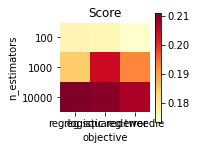

XGBRegressor(missing=nan, n_estimators=10000, objective='reg:logistic') 0.21100114793940025


In [ ]:
grid = {
    'n_estimators': [100, 1000, 10000],
    'objective'  : ['reg:logistic', 'reg:squarederror', 'reg:tweedie'],
}

paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(xgboost.XGBRegressor, paramGrid,
           x_train_sim, y_train_num, 
           X_val=x_test_sim, y_val=y_test_num,  
           metric = mean_absolute_error,
           )
print(bestModel, bestScore)

In [ ]:
xgb_r = xgboost.XGBRegressor(objective="reg:tweedie",
                  n_estimators = 100)

xgb_r.fit(x_train_sim, y_train_num)

pred_train_tree= xgb_r.predict(x_train_sim)
print(np.sqrt(mean_squared_error(y_train_num,pred_train_tree)))
print(r2_score(y_train_num, pred_train_tree))

0.1644536482101354
0.5129183042067329


In [ ]:
pred_test_tree= xgb_r.predict(x_test_sim)
print(np.sqrt(mean_squared_error(y_test_num,pred_test_tree)))
print(r2_score(y_test_num, pred_test_tree))

0.22474021263970487
0.3111876309430136


nilai R2 data testing mengingkat tetapi R2 data train juga menurun. ini karena model sudah tidak overfit dan nilai prediksi rendah

### regression report

In [ ]:
pd.DataFrame({'true':y_test_num*100, 'predict':pred_test_tree*100, 'mae':[mean_absolute_error([i[0]],[i[1]]) for i in list(zip(y_test_num,pred_test_tree))]})

,true,predict,mae
0,90.0,84.809914,0.051901
1,40.0,79.251884,0.392519
2,30.0,76.694618,0.466946
3,20.0,77.569870,0.575699
4,80.0,86.481354,0.064814
5,90.0,83.746338,0.062537
6,50.0,78.234573,0.282346
7,90.0,83.581558,0.064184
8,90.0,80.356033,0.096440
9,100.0,86.103935,0.138961


## Penjelasan

Decission Tree dan XGBost dipilih sebagai regressor karena keduanya cenderung bisa dipakai untuk data yang nonlinier dan firutnya banyak. Kedua regressor tidak dapat mengeneralisasi model. hasil R2 negatif berarti model tidak dapat mengikuti trend. R2 Negetif terjadi pada Decission Tree Regressor. ini berarti modeling bersifat overfitting. tapi ada juga nilai R2 yang menjadi lebih > 0 setelah fine tuning pada model XGBoost Regressor, walaupun begitu nilai R2 tidak lebih dari 50%, artinya model masih belum baik. nilai "similarity" tidak cocok untuk dijadikan fitur secara regresi untuk memprediksi human_rater. jika dilihat dari regression report nilai error kecil dan hasil prediksi cenderung mirip dengan target

# Modeling dengan word2vec Random Forest Classifier [15]

In [ ]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg_fuse, y_train)

print(rf_model.score(X_train_vect_avg_fuse, y_train),"\n")
print("accuracy training", classification_report(y_train, rf_model.predict(X_train_vect_avg_fuse)))

0.9942857142857143 

accuracy training               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         9
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        44

    accuracy                           0.99       175
   macro avg       0.98      0.99      0.98       175
weighted avg       1.00      0.99      0.99       175



In [ ]:
y_pred = rf_model.predict(X_test_vect_avg_fuse)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.20      1.00      0.34         9
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        13

    accuracy                           0.20        44
   macro avg       0.02      0.09      0.03        44
weighted avg       0.04      0.20      0.07        44



## hyperparameter tuning randomforest classifier [12]

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   14.3s remaining:    7.2s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   24.4s finished


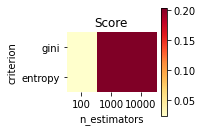

RandomForestClassifier(n_estimators=1000, n_jobs=-1) 0.20454545454545456


In [ ]:
grid = {
    'n_estimators': [100, 1000, 10000],
    'criterion'  : ['gini', 'entropy'],
    'n_jobs': [-1],
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(RandomForestClassifier, paramGrid,
           X_train_vect_avg_fuse, y_train, 
           X_val=X_test_vect_avg_fuse, y_val=y_test,  
           metric = accuracy_score,
           )
print(bestModel, bestScore)

## menerapkan finetuning random forest classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)

rf_model = rf.fit(X_train_vect_avg_fuse, y_train)

print("accuracy training", rf_model.score(X_train_vect_avg_fuse, y_train),"\n")

accuracy training 0.9942857142857143 



## classification report

In [ ]:
y_pred = rf_model.predict(X_test_vect_avg_fuse)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.20      1.00      0.34         9
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        13

    accuracy                           0.20        44
   macro avg       0.02      0.09      0.03        44
weighted avg       0.04      0.20      0.07        44



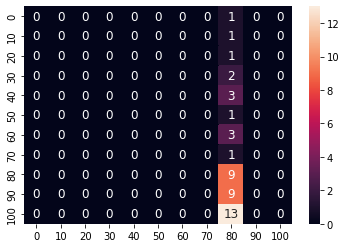

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_array_df = pd.DataFrame(confusion_matrix, index=target_names, columns=target_names)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}) 

## Penjelasan

nilai akurasi yang didapat pada data testing terlalu kecil 20-30%. ini menyatakan model ini tidak baik. menggunaan word2vec dengan metode penggabunagn "jawaban_dosen" dan "jawaban_mahasiswa" tidak cocok. pada classification report terlihat model cenderung memprediksi pada kelas 80 saja. false positif dari kelas lain cenderung ke arah kelas 80. hal itu karena banyak word vector yang mirip dengan kelas lain ada pada kelas 80 dan ketidakseimbangan kelas. nilai recall tertinggi ada pada kelas 80 dan precissionnya bernilai 0.2. ini menandakan true positifnya paling besar diantara kelas lainnya. semua kelas nilai lain gagal diprediksi. true positif tidak ada pada kelas lain.

# Modeling dengan Deep Learning LSTM Sederhana secara Categorical [14]

generate label encoding ke categorical encoding untuk keperluan prediksi categorical

In [ ]:
y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)

generate label encoding ke categorical encoding untuk keperluan prediksi regresi/continious

In [ ]:
y_train_num = data_train["human_rater"]/100
y_test_num = data_test["human_rater"]/100

In [ ]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(data_train['jawaban_mahasiswa'])

X1_train = tokenizer.texts_to_sequences(data_train['jawaban_mahasiswa'])
X1_test = tokenizer.texts_to_sequences(data_test['jawaban_mahasiswa'])

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

In [ ]:
embeddings_dictionary = dict()

embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
tokenizer2 = Tokenizer(num_words=500)
tokenizer2.fit_on_texts(data_train['jawaban_dosen'])

X2_train = tokenizer2.texts_to_sequences(data_train['jawaban_dosen'])
X2_test = tokenizer2.texts_to_sequences(data_test['jawaban_dosen'])

vocab_size2 = len(tokenizer2.word_index) + 1

maxlen = 200

X2_train = pad_sequences(X2_train, padding='post', maxlen=maxlen)
X2_test = pad_sequences(X2_test, padding='post', maxlen=maxlen)

In [ ]:
embeddings_dictionary2 = dict()

embedding_matrix2 = np.zeros((vocab_size2, 100))
for word, index in tokenizer2.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix2[index] = embedding_vector

In [ ]:
X3_train = data_train[['similarity']].values
X3_test = data_test[['similarity']].values

modeling deep learning dengan menggunakan 3 input ("jawaban_mahasiswa", "jawaban_dosen", "similarity" dan 1 output("human_rater")

In [ ]:
input_1 = Input(shape=(maxlen,))
input_2 = Input(shape=(maxlen,))
input_3 = Input(shape=(1,))

In [ ]:
embedding_layer1 = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=True)(input_1)
LSTM_Layer_1 = LSTM(128)(embedding_layer1)

embedding_layer2 = Embedding(vocab_size2, 100, weights=[embedding_matrix2], trainable=True)(input_2)
LSTM_Layer_2 = LSTM(128)(embedding_layer2)

dense_layer_1 = Dense(10, activation='relu')(input_3)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

In [ ]:
concat_layer = Concatenate()([LSTM_Layer_1, LSTM_Layer_2, dense_layer_2])
dense_layer_flat = Dense(128, activation='relu')(concat_layer)
dense_layer_flat = tf.keras.layers.Dropout(0.2)(dense_layer_flat)
dense_layer_flat = Dense(64, activation='relu')(dense_layer_flat)
dense_layer_flat = tf.keras.layers.Dropout(0.2)(dense_layer_flat)
dense_layer_flat = Dense(32, activation='relu')(dense_layer_flat)
output = Dense(11, activation='softmax')(dense_layer_flat)
model = Model(inputs=[input_1, input_2, input_3], outputs=output)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 200, 100)     67600       ['input_1[0][0]']                
                                                                                              

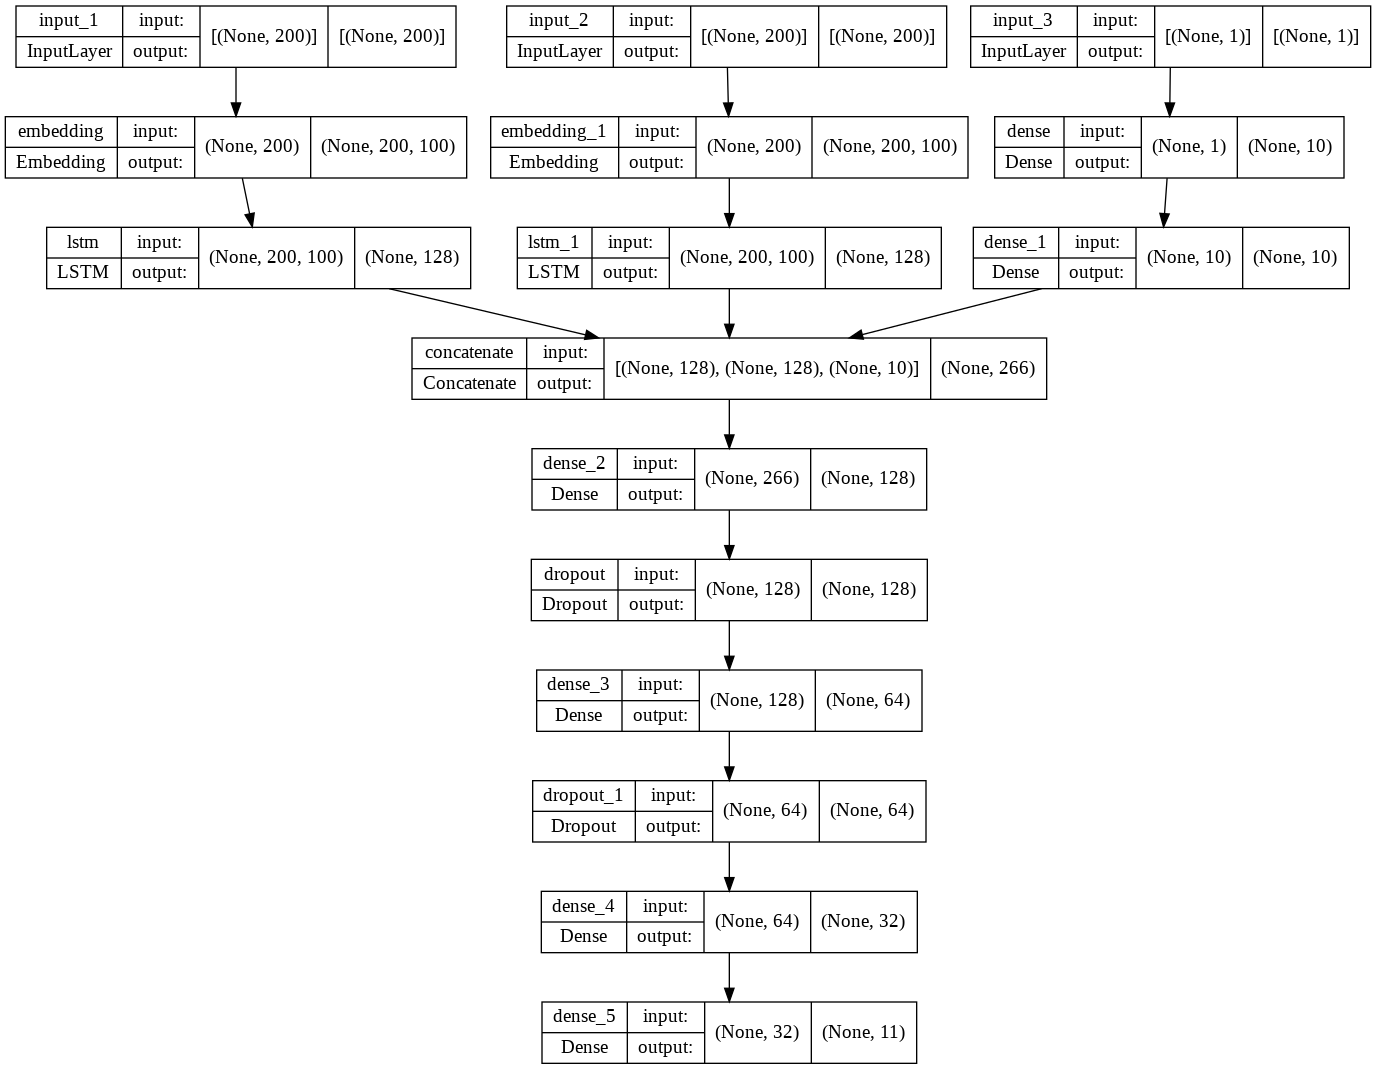

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x=[X1_train, X2_train, X3_train], y=y_train_cate, batch_size=32, epochs=100, verbose=1, validation_split=0.1)

Epoch 1/100
5/5 [==============================] - 8s 743ms/step - loss: 2.3963 - acc: 0.1783 - val_loss: 2.3933 - val_acc: 0.1667
Epoch 2/100
5/5 [==============================] - 2s 474ms/step - loss: 2.3937 - acc: 0.2420 - val_loss: 2.3888 - val_acc: 0.1667
Epoch 3/100
5/5 [==============================] - 2s 472ms/step - loss: 2.3905 - acc: 0.2484 - val_loss: 2.3849 - val_acc: 0.1667
Epoch 4/100
5/5 [==============================] - 2s 473ms/step - loss: 2.3876 - acc: 0.2038 - val_loss: 2.3809 - val_acc: 0.1667
Epoch 5/100
5/5 [==============================] - 2s 458ms/step - loss: 2.3838 - acc: 0.1975 - val_loss: 2.3766 - val_acc: 0.1667
Epoch 6/100
5/5 [==============================] - 2s 467ms/step - loss: 2.3798 - acc: 0.1720 - val_loss: 2.3711 - val_acc: 0.2778
Epoch 7/100
5/5 [==============================] - 2s 472ms/step - loss: 2.3757 - acc: 0.2229 - val_loss: 2.3636 - val_acc: 0.3333
Epoch 8/100
5/5 [==============================] - 2s 475ms/step - loss: 2.3704 - a

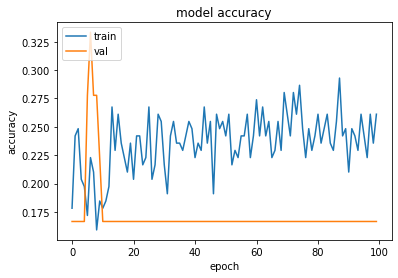

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

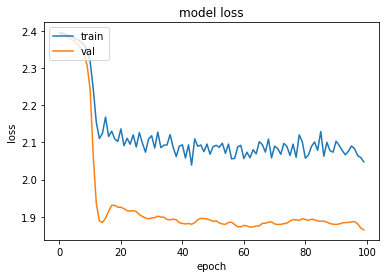

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict([X1_test, X2_test, X3_test])

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_test_true = np.argmax(y_test_cate, axis=1)

## classification report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         9
          10       0.30      1.00      0.46        13

    accuracy                           0.30        44
   macro avg       0.03      0.09      0.04        44
weighted avg       0.09      0.30      0.13        44



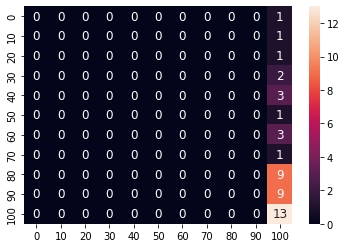

In [ ]:
from sklearn.metrics import confusion_matrix

print(classification_report(y_test_true, y_pred))

confusion_matrix = confusion_matrix(y_test_true, y_pred)

cm_array_df = pd.DataFrame(confusion_matrix, index=target_names, columns=target_names)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}) 

## penjelasan

dari hasil plot history model training. data validasi konstan seiring dengan berjalannya iterasi training, artinya model overfit. model dengan deep learning gagal menggeneralisasi data. hasil prediksi selalu pada kelas nilai 100, artinya pada kelas 100 memiliki nilai false negatif 0 dan model overfitting. jika dilihat dari kelas lain, tidak ada kelas lain yang bisa diprediksi. true positif bernilai 0 pada kelas lain. gagal memprediksi kelas lain karena banyak model cenderung melihat pola data hasil model arsitektur terakhir pada layer dense yang hampir sama semua dan mirip dengan kelas 100. hal ini dikarenakan data yang digunakan tidak balance dan juga tidak berkorelasi. kelas lain gagal diprediksi akibat ketidakseimbangan dataset.

# Kesimpulan

*  tidak ada model yang baik dalam memprediksi dataset yang diberikan. semua model uyang digunakan mengalami overfitting. artinya dataset yang diberikan tidak mampu diprediksi dengan metode yang digunakan disini atau dataset yang diberikan terlalu sedikit untuk bisa digeneralisasi.

*  hasil terbaik ada pada penggunaan penggabungan 2 fitur "jawaban_dosen" dan "jawaban_mahasiswa" menjadi "unique_corpus". dengan score 30-40% akurasi klasifikasi pada data test.

* hasil klasifikasi cenderung kepada kelas human_rater 80, 90 dan 100. hal ini dikarenakan banyaknya data pada kelas tersebut dan dataset imbalance.

* augmentasi tidak dilakukan karena pengacakan nilai dianggap berpengaruh pada juga pada perubahan nilai human_rater

# Download data training dan testing hasil splitting dataset

In [ ]:
from google.colab import files

train_df.to_csv('Azhari Haris Al Hamdi_train.csv')
test_df.to_csv('Azhari Haris Al Hamdi_test.csv')

files.download('Azhari Haris Al Hamdi_train.csv')
files.download('Azhari Haris Al Hamdi_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Referensi

[1] https://tau-data.id/d/nlptm-02.html

[2] https://ksnugroho.medium.com/dasar-text-preprocessing-dengan-python-a4fa52608ffe

[3] Wei, Jason & Zou, Kai. (2019). EDA: Easy Data Augmentation Techniques for Boosting Performance on Text Classification Tasks.

[4] https://maelfabien.github.io/machinelearning/NLP_8/#random-insertion-ri

[5] https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

[6] https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

[7] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[8] Speech and Language Processing. Daniel Jurafsky & James H. Martin. Copyright © 2021. All rights reserved. Draft of December 29, 2021.

[9] https://towardsdatascience.com/what-is-cosine-similarity-how-to-compare-text-and-images-in-python-d2bb6e411ef0

[10] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

[11] https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27

[12] https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4

[13] https://xgboost.readthedocs.io/en/stable/parameter.html

[14] https://stackabuse.com/python-for-nlp-creating-multi-data-type-classification-models-with-keras/

[15] https://medium.com/swlh/sentiment-classification-using-word-embeddings-word2vec-aedf28fbb8ca

[16] https://radimrehurek.com/gensim/
